In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200829_h3k9me3'

In [3]:
# already ran for the combination of DAPI and H3K9ME3 signals for each thresholds

'''
d=(10,20,30,40,50,60)
for i in d:
    
    file1=f'{bigDir}\\200819_cellinfo_v3_{i}.csv'
    file2=f'{bigDir}\\200819_cellinfo_v4_{i}.csv'

    data1=pd.read_csv(file1)
    data2=pd.read_csv(file2)

    data2=data2.drop(columns=data1.columns)
    data=data1.join(data2)

    data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])
    data=data.drop([90])
    for x in data.category:
        if type(x) is float:
            x = ""
    data.to_csv(file2.replace('v4','v5'))
'''

# 20% threshold

In [3]:
# reading in Version 6 of the cellinfo (has dapi, h3k9me3)
file = f'{bigDir}\\200819_cellinfo_v6_20.csv'
data = pd.read_csv(file)

<IPython.core.display.Javascript object>


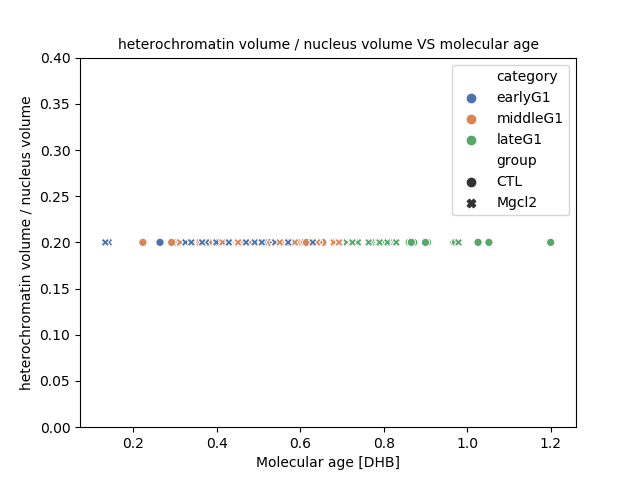

(0, 0.4)

In [4]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age',fontsize=10)
plt.ylim(0,0.4)

In [6]:
data['temp']=data.nuc_vol_het/data.nuc_vol_total
mgcl_mean = data.loc[(('G1' in x for x in data.category) and ('Mgcl2' in x for x in data.group)),'temp'].describe()['mean']
ctl_mean = data.loc[(('G1' in x for x in data.category) and ('CTL' in x for x in data.group)),'temp'].describe()['mean']
((mgcl_mean - ctl_mean) / mgcl_mean)

-4.0113688526116594e-05

<IPython.core.display.Javascript object>


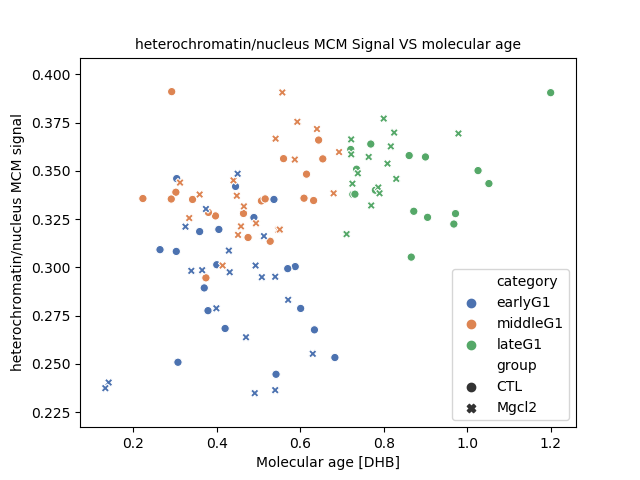

Text(0.5, 1.0, 'heterochromatin/nucleus MCM Signal VS molecular age')

In [7]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_mcm_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus MCM signal')
plt.title('heterochromatin/nucleus MCM Signal VS molecular age',fontsize=10)

<IPython.core.display.Javascript object>


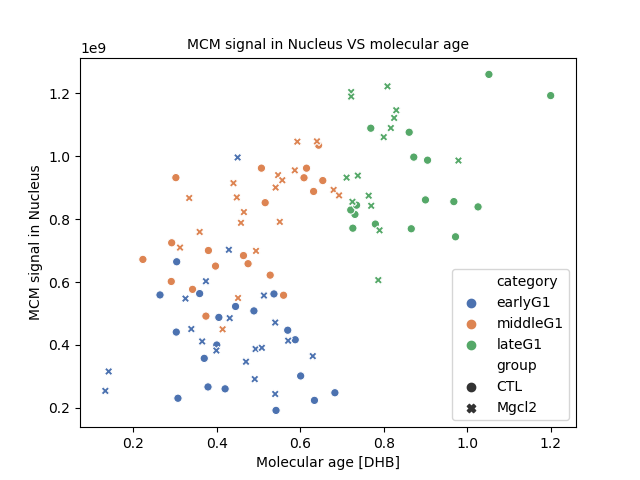

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [8]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data.loc[(['G1' in x for x in data.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age', fontsize=10)

<IPython.core.display.Javascript object>


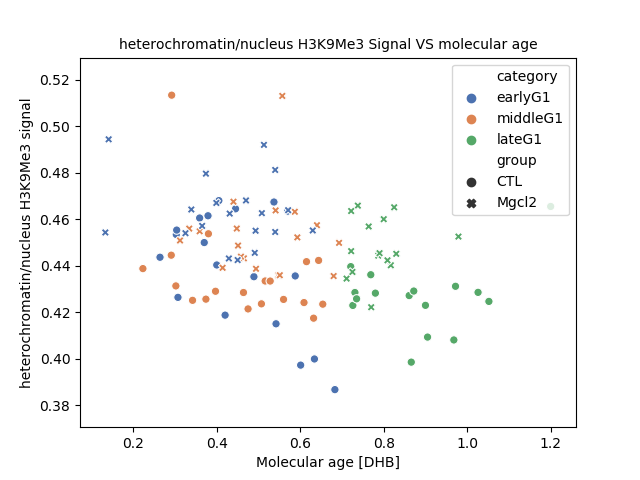

Text(0.5, 1.0, 'heterochromatin/nucleus H3K9Me3 Signal VS molecular age')

In [9]:
%matplotlib notebook
data['temp']=data.nuc_h3k9me3_het/data.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus H3K9Me3 signal')
plt.title('heterochromatin/nucleus H3K9Me3 Signal VS molecular age',fontsize=10)


<IPython.core.display.Javascript object>


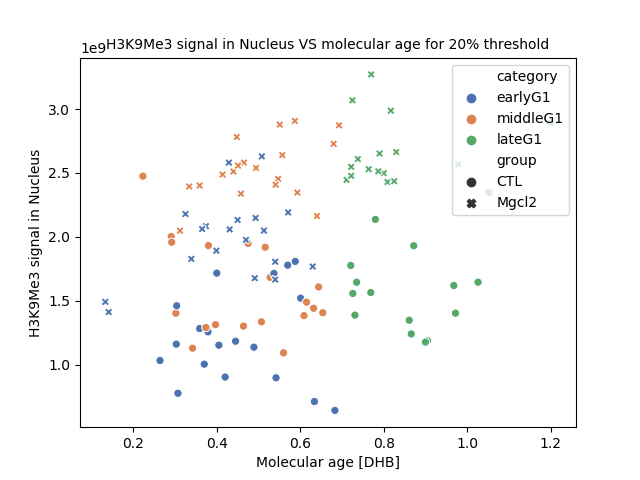

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS molecular age for 20% threshold')

In [10]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_h3k9me3_total',data=data.loc[(['G1' in x for x in data.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS molecular age for 20% threshold', fontsize=10)

<IPython.core.display.Javascript object>


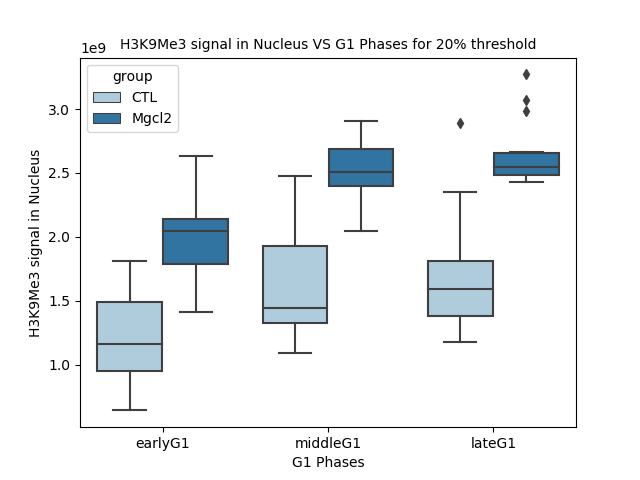

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS G1 Phases for 20% threshold')

In [11]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.boxplot(x='category',y='nuc_h3k9me3_total',data=data.loc[(['G1' in x for x in data.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS G1 Phases for 20% threshold', fontsize=10)

<IPython.core.display.Javascript object>


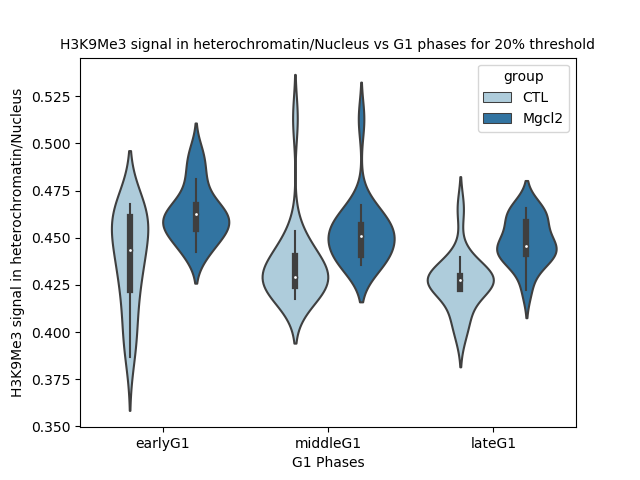

Text(0.5, 1.0, 'H3K9Me3 signal in heterochromatin/Nucleus vs G1 phases for 20% threshold')

In [12]:
%matplotlib notebook
data['temp']=data.nuc_h3k9me3_het/data.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.violinplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in heterochromatin/Nucleus')
plt.title('H3K9Me3 signal in heterochromatin/Nucleus vs G1 phases for 20% threshold', fontsize=10)

# 30% threshold 

In [13]:
file30 = f'{bigDir}\\200819_cellinfo_v6_30.csv'
data30 = pd.read_csv(file30)

<IPython.core.display.Javascript object>


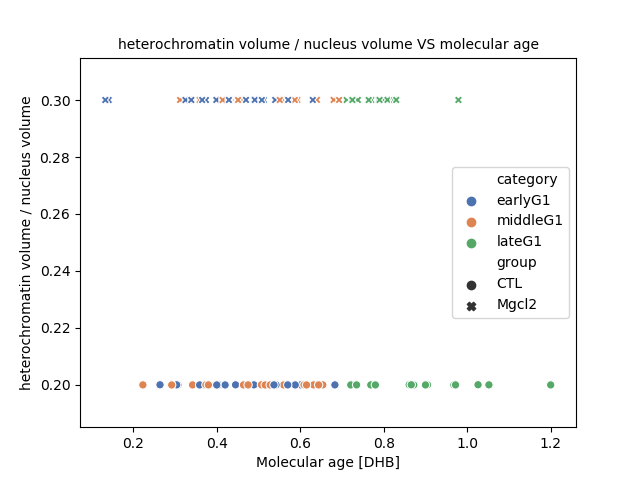

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [14]:
%matplotlib notebook
data30['temp']=data30.nuc_vol_het/data30.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data30.loc[(['G1' in x for x in data30.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age',fontsize=10)


In [15]:
data30['temp']=data30.nuc_vol_het/data30.nuc_vol_total
mgcl_mean = data30.loc[(('G1' in x for x in data30.category) and ('Mgcl2' in x for x in data30.group)),'temp'].describe()['mean']
ctl_mean = data30.loc[(('G1' in x for x in data30.category) and ('CTL' in x for x in data30.group)),'temp'].describe()['mean']
((mgcl_mean - ctl_mean) / mgcl_mean)

0.33329314482020767

<IPython.core.display.Javascript object>


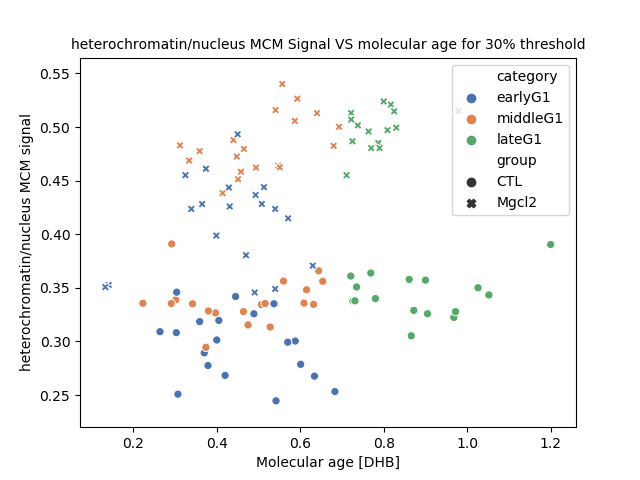

Text(0.5, 1.0, 'heterochromatin/nucleus MCM Signal VS molecular age for 30% threshold')

In [16]:
%matplotlib notebook
data30['temp']=data30.nuc_mcm_het/data30.nuc_mcm_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data30.loc[(['G1' in x for x in data30.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus MCM signal')
plt.title('heterochromatin/nucleus MCM Signal VS molecular age for 30% threshold',fontsize=10)

<IPython.core.display.Javascript object>


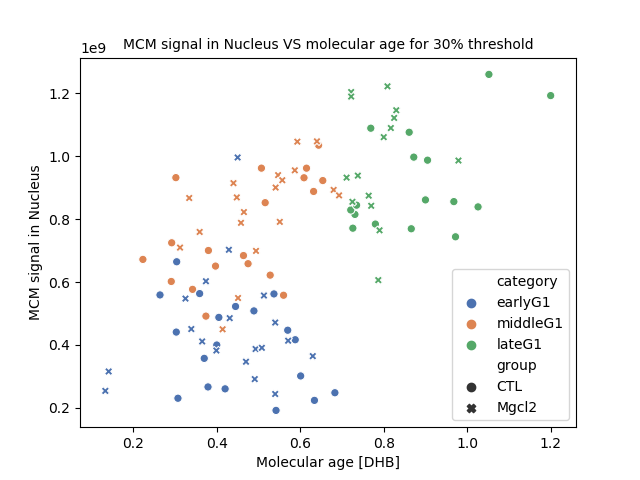

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for 30% threshold')

In [17]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data30.loc[(['G1' in x for x in data30.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for 30% threshold', fontsize=10)

<IPython.core.display.Javascript object>


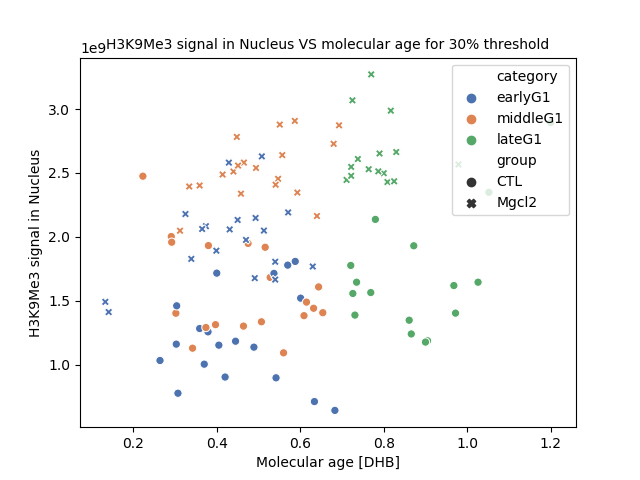

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS molecular age for 30% threshold')

In [18]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_h3k9me3_total',data=data30.loc[(['G1' in x for x in data30.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS molecular age for 30% threshold', fontsize=10)

<IPython.core.display.Javascript object>


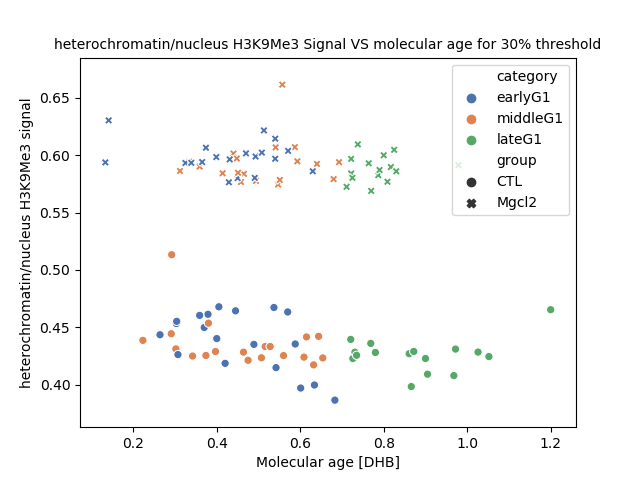

Text(0.5, 1.0, 'heterochromatin/nucleus H3K9Me3 Signal VS molecular age for 30% threshold')

In [19]:
%matplotlib notebook
data30['temp']=data30.nuc_h3k9me3_het/data30.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data30.loc[(['G1' in x for x in data30.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus H3K9Me3 signal')
plt.title('heterochromatin/nucleus H3K9Me3 Signal VS molecular age for 30% threshold',fontsize=10)

<IPython.core.display.Javascript object>


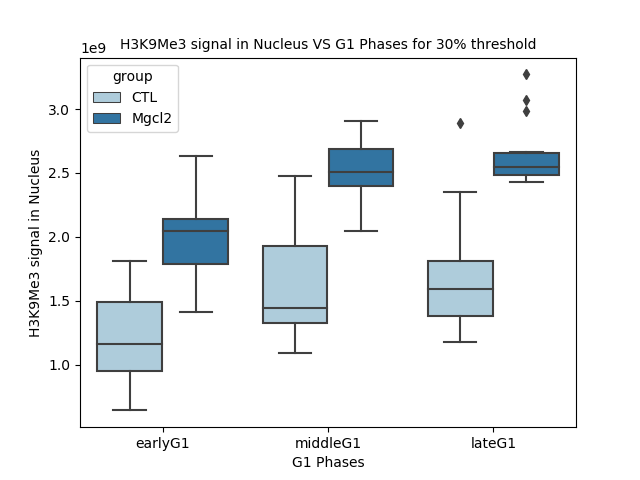

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS G1 Phases for 30% threshold')

In [20]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.boxplot(x='category',y='nuc_h3k9me3_total',data=data30.loc[(['G1' in x for x in data30.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS G1 Phases for 30% threshold', fontsize=10)

<IPython.core.display.Javascript object>


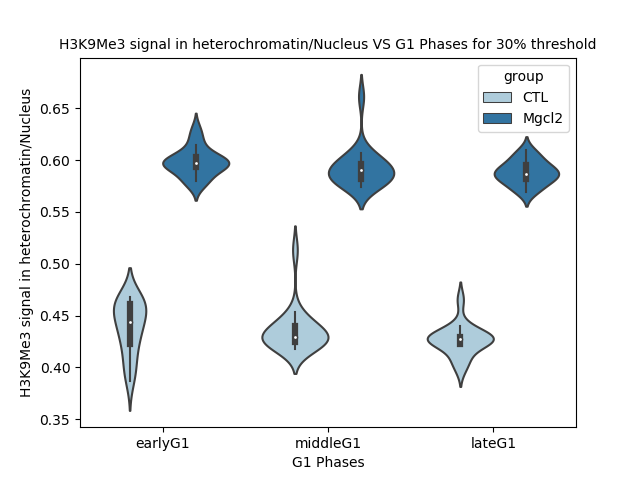

Text(0.5, 1.0, 'H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 30% threshold')

In [21]:
%matplotlib notebook
data30['temp']=data30.nuc_h3k9me3_het/data30.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.violinplot(x='category',y='temp',data=data30.loc[(['G1' in x for x in data30.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in heterochromatin/Nucleus')
plt.title('H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 30% threshold', fontsize=10)

In [22]:
mgcl_mean = data30.loc[(('G1' in x for x in data30.category) and ('Mgcl2' in x for x in data30.group)),'temp'].describe()['mean']

In [23]:
ctl_mean = data30.loc[(('G1' in x for x in data30.category) and ('CTL' in x for x in data30.group)),'temp'].describe()['mean']

In [24]:
(mgcl_mean - ctl_mean) / mgcl_mean

0.27562191001353686

# 40% threshold 

In [25]:
file40 = f'{bigDir}\\200819_cellinfo_v6_40.csv'
data40 = pd.read_csv(file40)

<IPython.core.display.Javascript object>


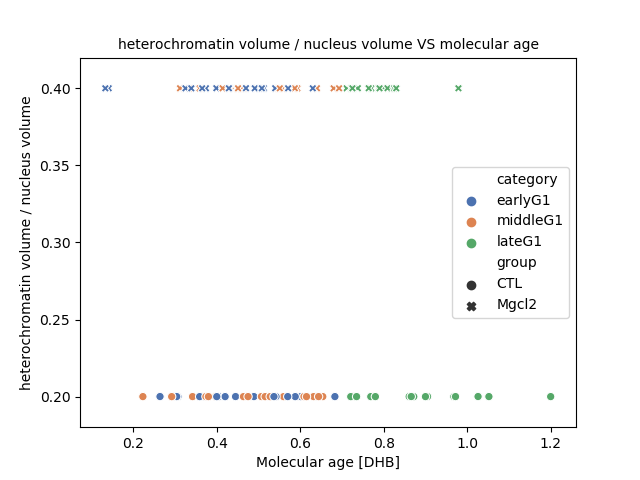

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [26]:
%matplotlib notebook
data40['temp']=data40.nuc_vol_het/data40.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data40.loc[(['G1' in x for x in data40.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age',fontsize=10)


In [27]:
data40['temp']=data40.nuc_vol_het/data40.nuc_vol_total
mgcl_mean = data40.loc[(('G1' in x for x in data40.category) and ('Mgcl2' in x for x in data40.group)),'temp'].describe()['mean']
ctl_mean = data40.loc[(('G1' in x for x in data40.category) and ('CTL' in x for x in data40.group)),'temp'].describe()['mean']
((mgcl_mean - ctl_mean) / mgcl_mean)

0.49996982483890245

<IPython.core.display.Javascript object>


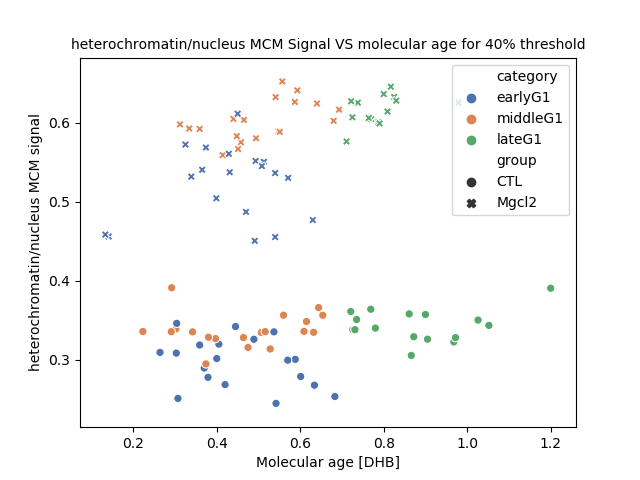

Text(0.5, 1.0, 'heterochromatin/nucleus MCM Signal VS molecular age for 40% threshold')

In [28]:
%matplotlib notebook
data40['temp']=data40.nuc_mcm_het/data40.nuc_mcm_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data40.loc[(['G1' in x for x in data40.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus MCM signal')
plt.title('heterochromatin/nucleus MCM Signal VS molecular age for 40% threshold',fontsize=10)

<IPython.core.display.Javascript object>


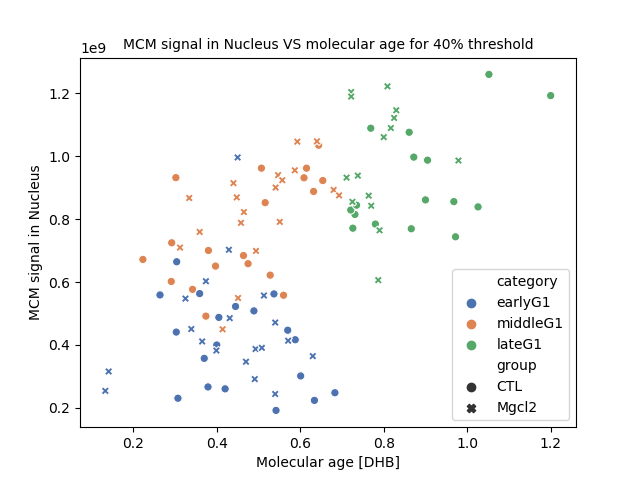

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for 40% threshold')

In [29]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data40.loc[(['G1' in x for x in data40.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for 40% threshold', fontsize=10)

<IPython.core.display.Javascript object>


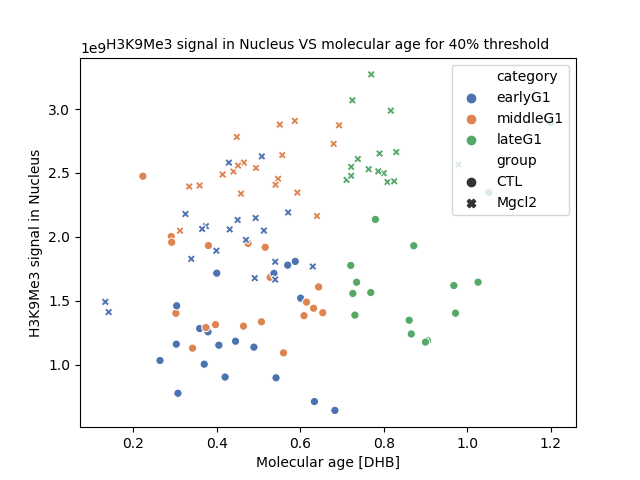

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS molecular age for 40% threshold')

In [30]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_h3k9me3_total',data=data40.loc[(['G1' in x for x in data40.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS molecular age for 40% threshold', fontsize=10)

<IPython.core.display.Javascript object>


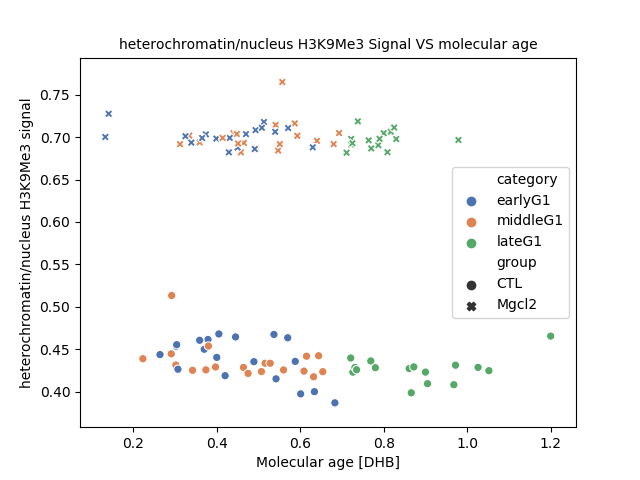

Text(0.5, 1.0, 'heterochromatin/nucleus H3K9Me3 Signal VS molecular age')

In [31]:
%matplotlib notebook
data40['temp']=data40.nuc_h3k9me3_het/data40.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data40.loc[(['G1' in x for x in data40.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus H3K9Me3 signal')
plt.title('heterochromatin/nucleus H3K9Me3 Signal VS molecular age',fontsize=10)

<IPython.core.display.Javascript object>


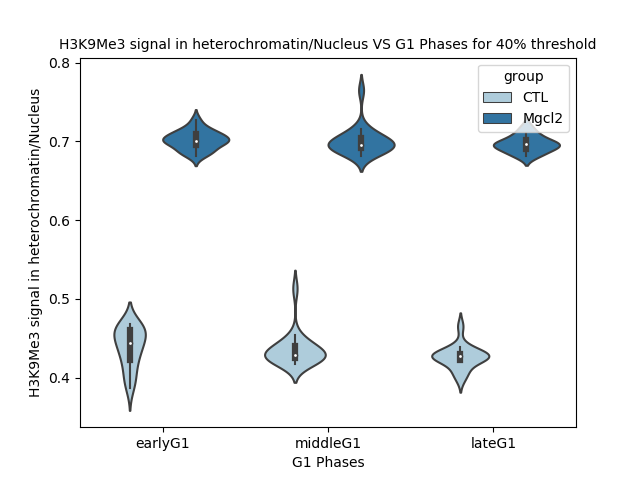

Text(0.5, 1.0, 'H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 40% threshold')

In [32]:
%matplotlib notebook
data40['temp']=data40.nuc_h3k9me3_het/data40.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.violinplot(x='category',y='temp',data=data40.loc[(['G1' in x for x in data40.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in heterochromatin/Nucleus')
plt.title('H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 40% threshold', fontsize=10)

In [33]:
mgcl_mean = data40.loc[(('G1' in x for x in data40.category) and ('Mgcl2' in x for x in data40.group)),'temp'].describe()['mean']

In [34]:
ctl_mean = data40.loc[(('G1' in x for x in data40.category) and ('CTL' in x for x in data40.group)),'temp'].describe()['mean']

In [35]:
(mgcl_mean - ctl_mean) / mgcl_mean

0.3861222728362039

# 50% threshold 

In [36]:
file50 = f'{bigDir}\\200819_cellinfo_v6_50.csv'
data50 = pd.read_csv(file50)

<IPython.core.display.Javascript object>


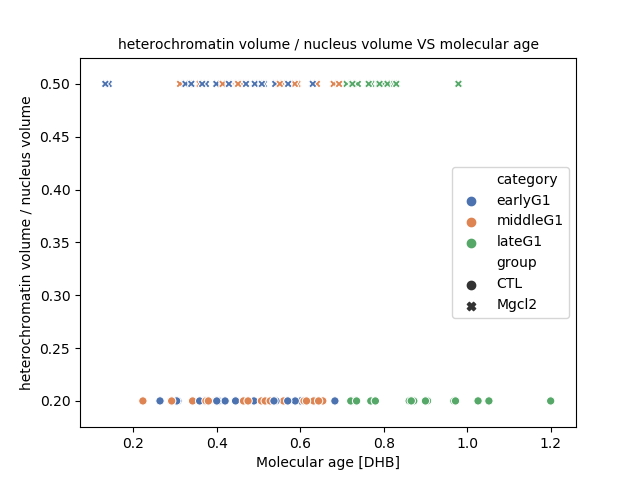

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [37]:
%matplotlib notebook
data50['temp']=data50.nuc_vol_het/data50.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data50.loc[(['G1' in x for x in data50.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age',fontsize=10)


In [38]:
data50['temp']=data50.nuc_vol_het/data50.nuc_vol_total
mgcl_mean = data50.loc[(('G1' in x for x in data50.category) and ('Mgcl2' in x for x in data50.group)),'temp'].describe()['mean']
ctl_mean = data50.loc[(('G1' in x for x in data50.category) and ('CTL' in x for x in data50.group)),'temp'].describe()['mean']
((mgcl_mean - ctl_mean) / mgcl_mean)

0.5999747249692418

<IPython.core.display.Javascript object>


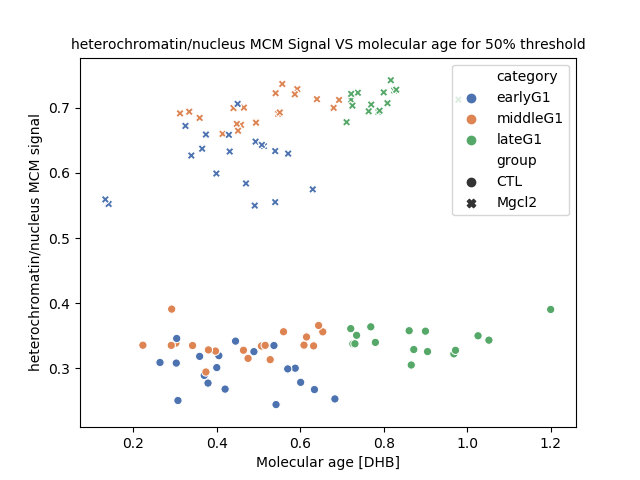

Text(0.5, 1.0, 'heterochromatin/nucleus MCM Signal VS molecular age for 50% threshold')

In [39]:
%matplotlib notebook
data50['temp']=data50.nuc_mcm_het/data50.nuc_mcm_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data50.loc[(['G1' in x for x in data50.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus MCM signal')
plt.title('heterochromatin/nucleus MCM Signal VS molecular age for 50% threshold',fontsize=10)

<IPython.core.display.Javascript object>


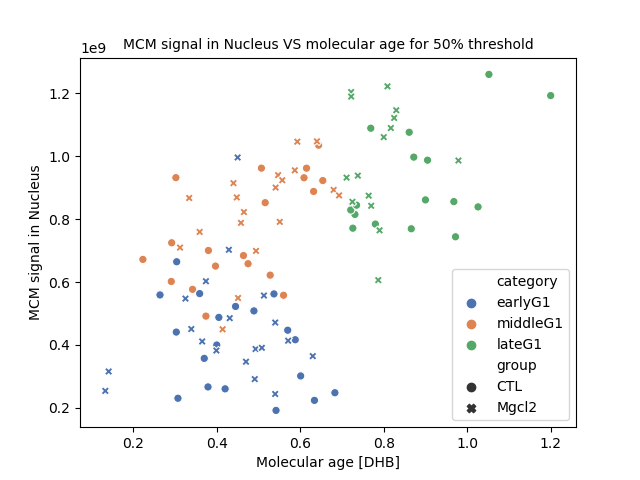

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for 50% threshold')

In [40]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data50.loc[(['G1' in x for x in data50.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for 50% threshold', fontsize=10)

<IPython.core.display.Javascript object>


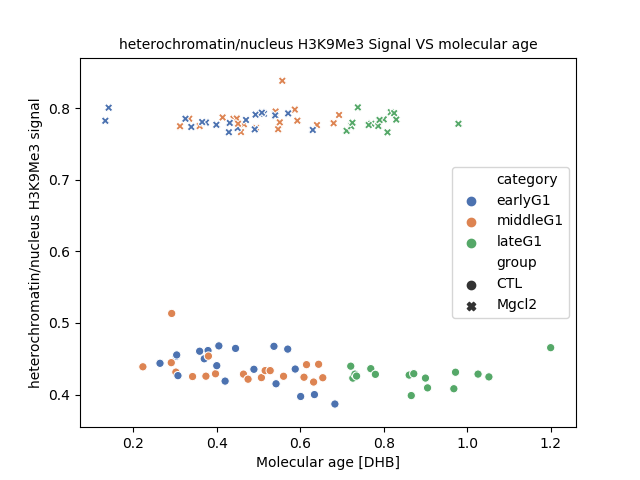

Text(0.5, 1.0, 'heterochromatin/nucleus H3K9Me3 Signal VS molecular age')

In [41]:
%matplotlib notebook
data50['temp']=data50.nuc_h3k9me3_het/data50.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data50.loc[(['G1' in x for x in data50.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus H3K9Me3 signal')
plt.title('heterochromatin/nucleus H3K9Me3 Signal VS molecular age',fontsize=10)

<IPython.core.display.Javascript object>


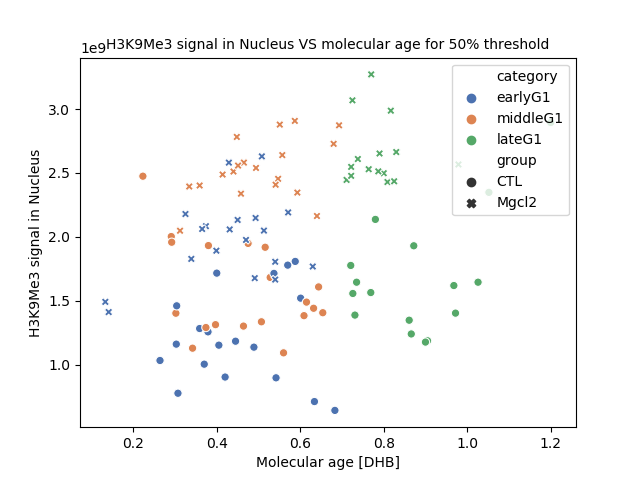

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS molecular age for 50% threshold')

In [42]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_h3k9me3_total',data=data50.loc[(['G1' in x for x in data50.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS molecular age for 50% threshold', fontsize=10)

<IPython.core.display.Javascript object>


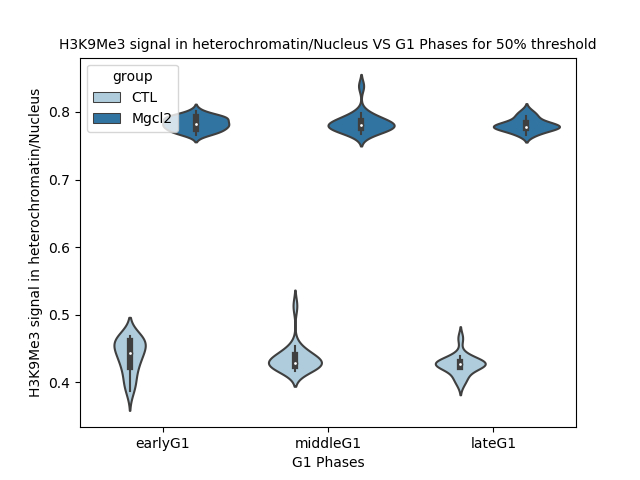

Text(0.5, 1.0, 'H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 50% threshold')

In [43]:
%matplotlib notebook
data50['temp']=data50.nuc_h3k9me3_het/data50.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.violinplot(x='category',y='temp',data=data50.loc[(['G1' in x for x in data50.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in heterochromatin/Nucleus')
plt.title('H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 50% threshold', fontsize=10)

In [44]:
mgcl_mean = data50.loc[(('G1' in x for x in data50.category) and ('Mgcl2' in x for x in data50.group)),'temp'].describe()['mean']

In [45]:
ctl_mean = data50.loc[(('G1' in x for x in data50.category) and ('CTL' in x for x in data50.group)),'temp'].describe()['mean']

In [46]:
(mgcl_mean - ctl_mean) / mgcl_mean

0.4509703974795811

# 60% threshold 

In [47]:
file60 = f'{bigDir}\\200819_cellinfo_v6_60.csv'
data60 = pd.read_csv(file60)

<IPython.core.display.Javascript object>


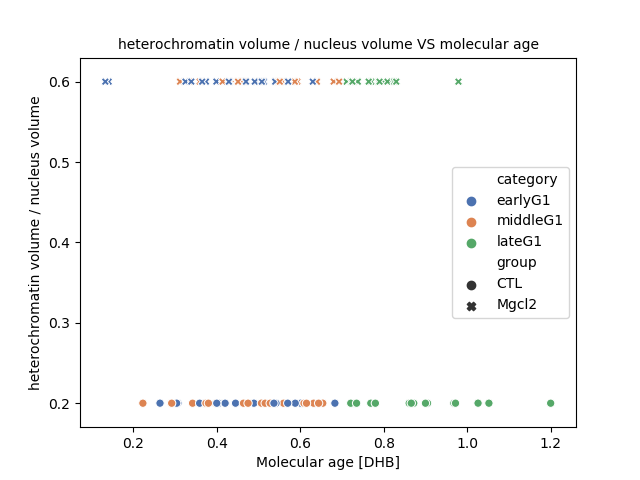

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [48]:
%matplotlib notebook
data60['temp']=data60.nuc_vol_het/data60.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data60.loc[(['G1' in x for x in data60.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age',fontsize=10)


In [49]:
data60['temp']=data60.nuc_vol_het/data60.nuc_vol_total
mgcl_mean = data60.loc[(('G1' in x for x in data60.category) and ('Mgcl2' in x for x in data60.group)),'temp'].describe()['mean']
ctl_mean = data60.loc[(('G1' in x for x in data60.category) and ('CTL' in x for x in data60.group)),'temp'].describe()['mean']
((mgcl_mean - ctl_mean) / mgcl_mean)

0.6666493028846618

<IPython.core.display.Javascript object>


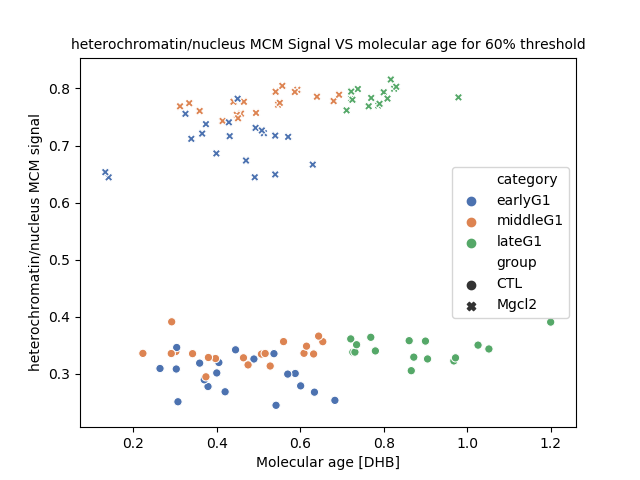

Text(0.5, 1.0, 'heterochromatin/nucleus MCM Signal VS molecular age for 60% threshold')

In [50]:
%matplotlib notebook
data60['temp']=data60.nuc_mcm_het/data60.nuc_mcm_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data60.loc[(['G1' in x for x in data60.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus MCM signal')
plt.title('heterochromatin/nucleus MCM Signal VS molecular age for 60% threshold',fontsize=10)

<IPython.core.display.Javascript object>


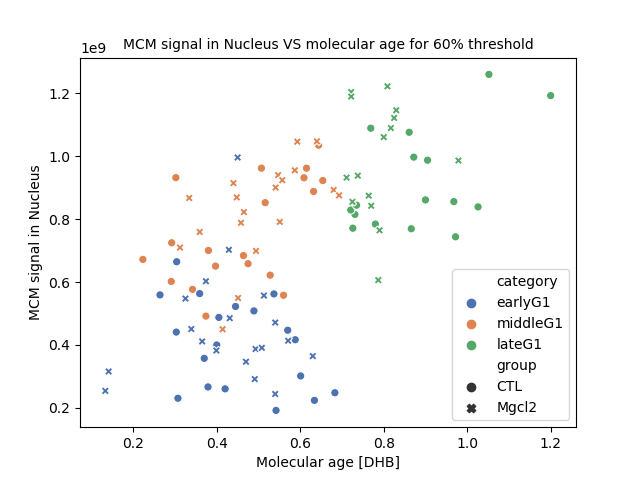

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for 60% threshold')

In [51]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data60.loc[(['G1' in x for x in data60.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for 60% threshold', fontsize=10)

<IPython.core.display.Javascript object>


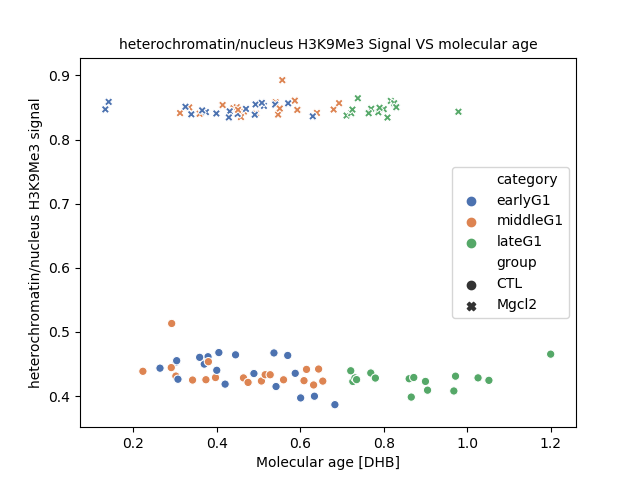

Text(0.5, 1.0, 'heterochromatin/nucleus H3K9Me3 Signal VS molecular age')

In [52]:
%matplotlib notebook
data60['temp']=data60.nuc_h3k9me3_het/data60.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='temp',data=data60.loc[(['G1' in x for x in data60.category]),:],
                hue='category',hue_order = labels, palette = 'deep', style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin/nucleus H3K9Me3 signal')
plt.title('heterochromatin/nucleus H3K9Me3 Signal VS molecular age',fontsize=10)

<IPython.core.display.Javascript object>


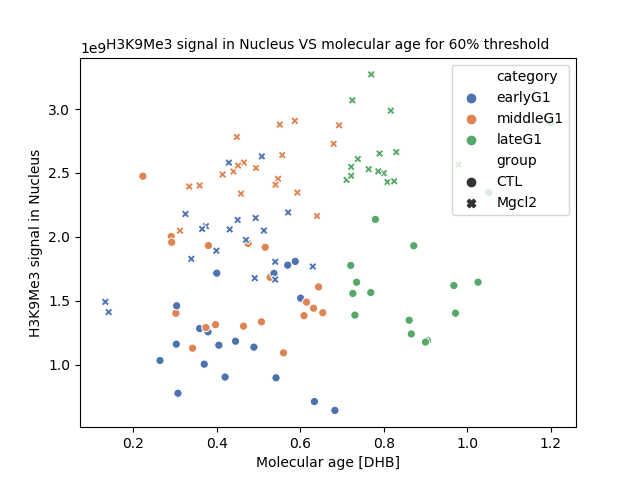

Text(0.5, 1.0, 'H3K9Me3 signal in Nucleus VS molecular age for 60% threshold')

In [53]:
%matplotlib notebook
labels = ['earlyG1','middleG1','lateG1']
sns.scatterplot(x='mol_age_mod',y='nuc_h3k9me3_total',data=data60.loc[(['G1' in x for x in data60.category]),:],
                hue='category',palette='deep',hue_order = labels, style = 'group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('H3K9Me3 signal in Nucleus')
plt.title('H3K9Me3 signal in Nucleus VS molecular age for 60% threshold', fontsize=10)

<IPython.core.display.Javascript object>


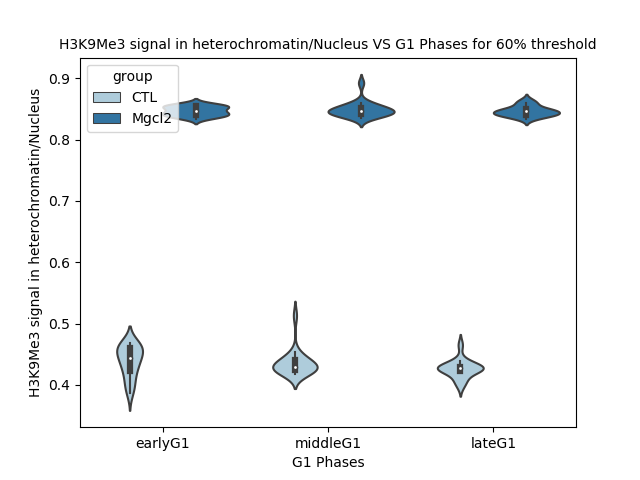

Text(0.5, 1.0, 'H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 60% threshold')

In [54]:
%matplotlib notebook
data60['temp']=data60.nuc_h3k9me3_het/data60.nuc_h3k9me3_total
labels = ['earlyG1','middleG1','lateG1']
sns.violinplot(x='category',y='temp',data=data60.loc[(['G1' in x for x in data60.category]),:],
            hue='group',palette='Paired', order = labels)
plt.xlabel('G1 Phases')
plt.ylabel('H3K9Me3 signal in heterochromatin/Nucleus')
plt.title('H3K9Me3 signal in heterochromatin/Nucleus VS G1 Phases for 60% threshold', fontsize=10)

In [55]:
mgcl_mean = data60.loc[(('G1' in x for x in data60.category) and ('Mgcl2' in x for x in data60.group)),'temp'].describe()['mean']

In [56]:
ctl_mean = data60.loc[(('G1' in x for x in data60.category) and ('CTL' in x for x in data60.group)),'temp'].describe()['mean']

In [57]:
(mgcl_mean - ctl_mean) / mgcl_mean

0.4930467598102863

# violin plots

<IPython.core.display.Javascript object>


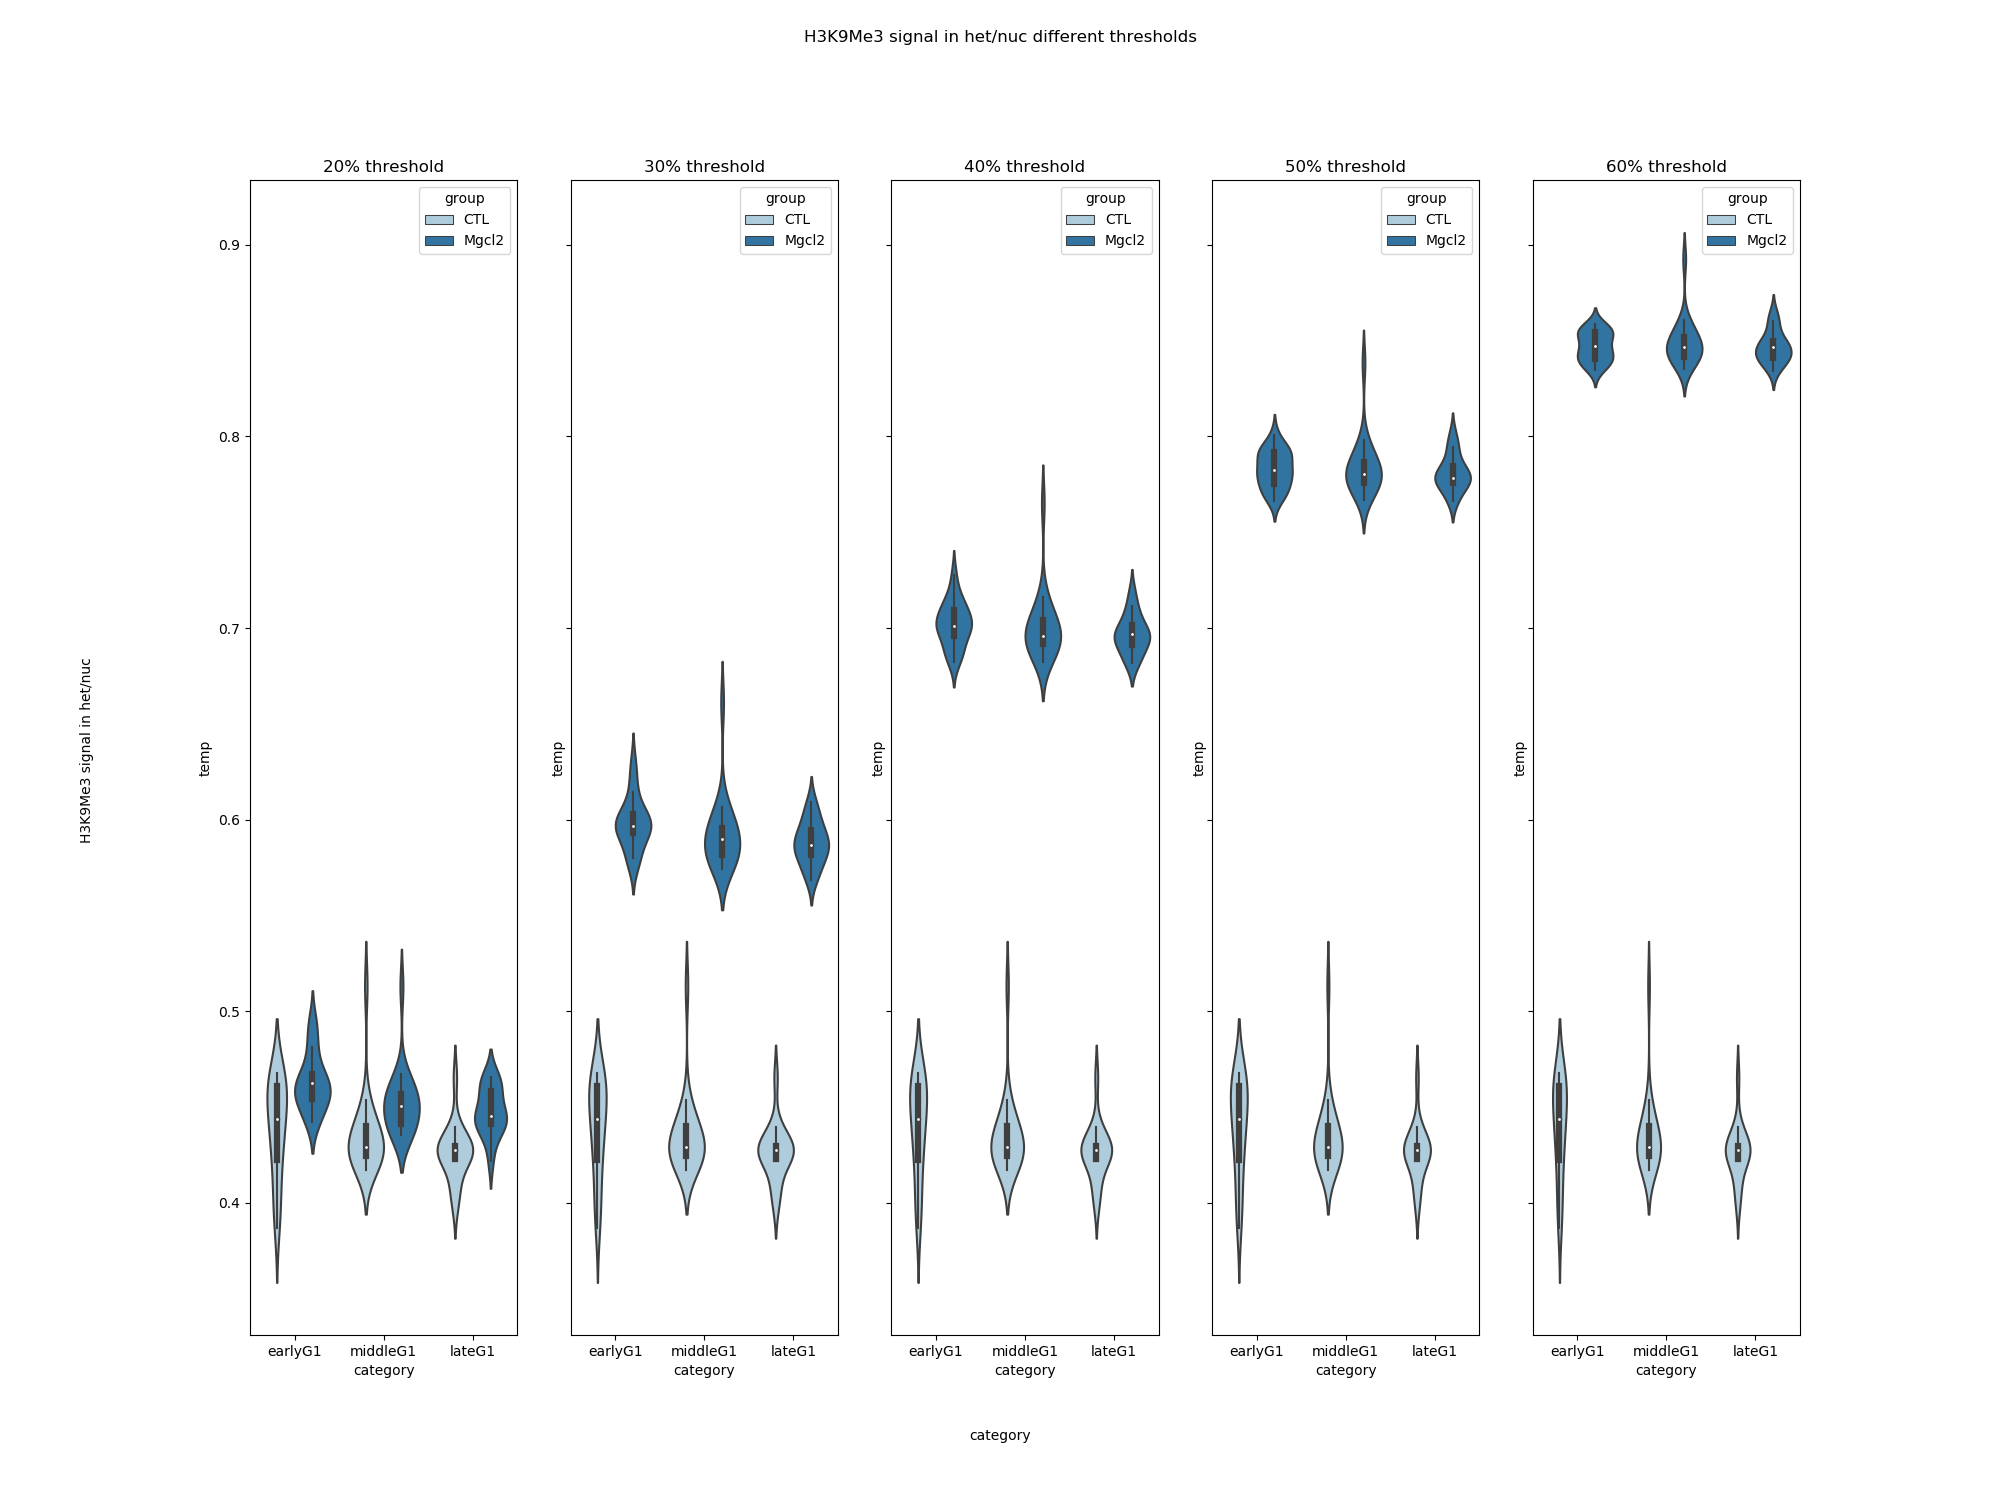

In [61]:
%matplotlib notebook
fig, axs = plt.subplots(1, 5,sharex=True,sharey=True)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('H3K9Me3 signal in het/nuc different thresholds')
fig.text(0.5, 0.04, 'category', ha='center')
fig.text(0.04, 0.5, 'H3K9Me3 signal in het/nuc', va='center', rotation='vertical')

data['temp']=data.nuc_h3k9me3_het/data.nuc_h3k9me3_total
sns.violinplot(x='category', y = 'temp', data=data.loc[(['G1' in x for x in data.category]),:],hue ='group',
              ax=axs[0], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[0].set_title("20% threshold")

data30['temp']=data30.nuc_h3k9me3_het/data30.nuc_h3k9me3_total
sns.violinplot(x='category', y = 'temp', data=data30.loc[(['G1' in x for x in data30.category]),:],hue ='group',
              ax=axs[1], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[1].set_title("30% threshold")

data40['temp']=data40.nuc_h3k9me3_het/data40.nuc_h3k9me3_total
sns.violinplot(x='category', y = 'temp', data=data40.loc[(['G1' in x for x in data40.category]),:],hue ='group',
              ax=axs[2], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[2].set_title("40% threshold")

data50['temp']=data50.nuc_h3k9me3_het/data50.nuc_h3k9me3_total
sns.violinplot(x='category', y = 'temp', data=data50.loc[(['G1' in x for x in data50.category]),:],hue ='group',
              ax=axs[3], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[3].set_title("50% threshold")

data60['temp']=data60.nuc_h3k9me3_het/data60.nuc_h3k9me3_total
sns.violinplot(x='category', y = 'temp', data=data60.loc[(['G1' in x for x in data60.category]),:],hue ='group',
              ax=axs[4], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[4].set_title("60% threshold")


plt.savefig(f"{bigDir}//H3K9Me3Signal_comparison.png")

<IPython.core.display.Javascript object>


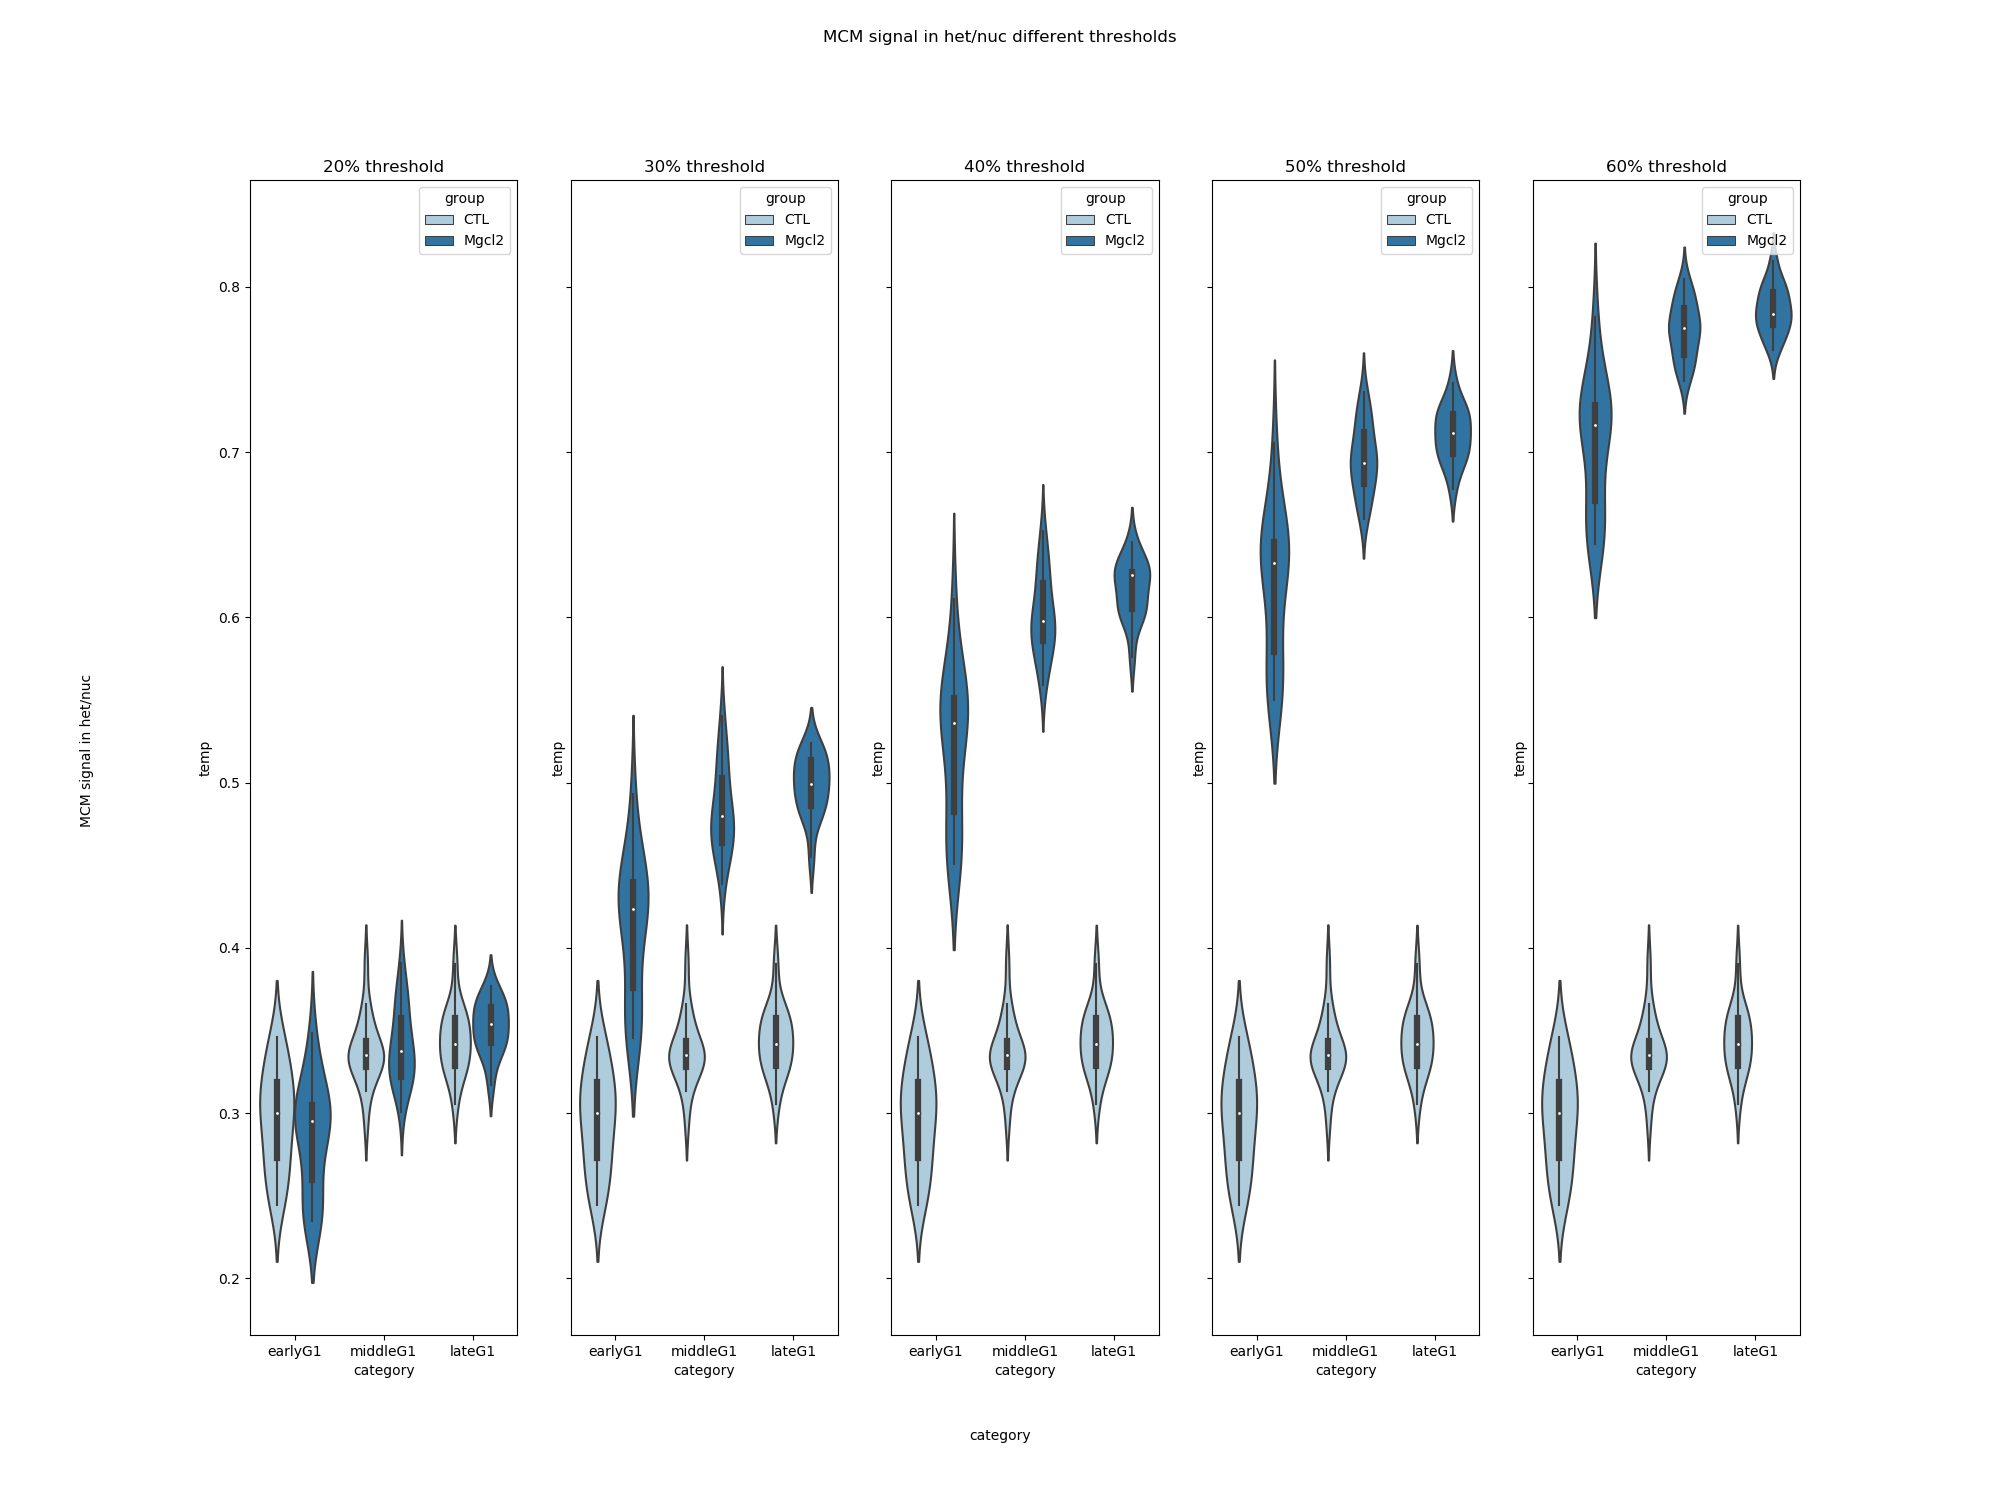

In [60]:
%matplotlib notebook
fig, axs = plt.subplots(1, 5,sharex=True,sharey=True)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('MCM signal in het/nuc different thresholds')
fig.text(0.5, 0.04, 'category', ha='center')
fig.text(0.04, 0.5, 'MCM signal in het/nuc', va='center', rotation='vertical')

data['temp']=data.nuc_mcm_het/data.nuc_mcm_total
sns.violinplot(x='category', y = 'temp', data=data.loc[(['G1' in x for x in data.category]),:],hue ='group',
              ax=axs[0], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[0].set_title("20% threshold")

data30['temp']=data30.nuc_mcm_het/data30.nuc_mcm_total
sns.violinplot(x='category', y = 'temp', data=data30.loc[(['G1' in x for x in data30.category]),:],hue ='group',
              ax=axs[1], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[1].set_title("30% threshold")

data40['temp']=data40.nuc_mcm_het/data40.nuc_mcm_total
sns.violinplot(x='category', y = 'temp', data=data40.loc[(['G1' in x for x in data40.category]),:],hue ='group',
              ax=axs[2], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[2].set_title("40% threshold")

data50['temp']=data50.nuc_mcm_het/data50.nuc_mcm_total
sns.violinplot(x='category', y = 'temp', data=data50.loc[(['G1' in x for x in data50.category]),:],hue ='group',
              ax=axs[3], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[3].set_title("50% threshold")

data60['temp']=data60.nuc_mcm_het/data60.nuc_mcm_total
sns.violinplot(x='category', y = 'temp', data=data60.loc[(['G1' in x for x in data60.category]),:],hue ='group',
              ax=axs[4], order = ['earlyG1','middleG1','lateG1'], palette='Paired')
axs[4].set_title("60% threshold")


plt.savefig(f"{bigDir}//MCMSignal_comparison.png")